In [1]:
# Dataset: iris.csv
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('iris.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
x = df.drop('species', axis = 1)
y = df['species']

In [6]:
y.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler()

In [12]:
x_scaled = sc.fit_transform(x)

In [14]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## cross validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   test_size=0.25,
                                                   random_state= 0)

## build the model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors= 4)

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
## Evaluate

In [22]:
y_pred = knn.predict(x_test)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

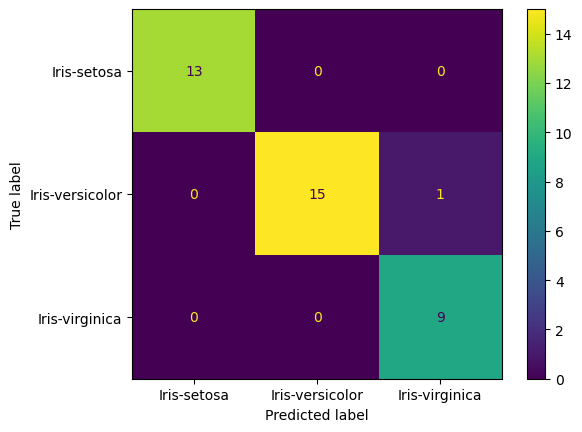

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [29]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [30]:
# error rate
np.mean(y_test != y_pred)

0.02631578947368421

In [31]:
# best k value

error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [32]:
error

[0.02631578947368421,
 0.05263157894736842,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.0,
 0.02631578947368421,
 0.02631578947368421,
 0.05263157894736842,
 0.02631578947368421,
 0.05263157894736842,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.07894736842105263,
 0.05263157894736842,
 0.07894736842105263,
 0.0

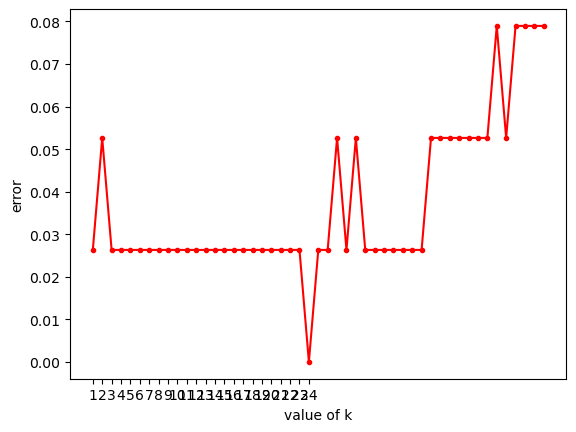

In [42]:
plt.xlabel('value of k')
plt.ylabel('error')
plt.xticks(range(1,25))
plt.plot(range(1,50), error, color = 'r', marker = 'o', ms = 3);